<a href="https://colab.research.google.com/github/DataCognita/testrepo/blob/master/segmentation_reseau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/MesDonnées/segmentation.csv', sep=";", decimal = ".")
data = data.drop('Code Agence', axis =1)
data

,nbcli,clipot,immo,conso,ass,g1,g2,g3,g5,g6,g8,g10,g20,ag02,ag2,ag3,ag5,ag45,cc2,cc3,cc4,cc5,cc6,cc7,cc8,cc10,cc15
0,15768,9415,18,69,186,3617,13425,29293,1100,527,156,87,105,6412,1456,6534,3332,366,2084,5344,2922,6184,5822,1075,1637,1522,368
1,3347,2121,5,11,5,144,791,13748,294,105,2,8,18,834,489,899,560,141,360,582,739,1355,761,276,245,222,21
2,2730,1159,1,4,5,52,0,14637,18,0,0,9,2,438,262,478,899,65,553,554,51,540,443,20,97,458,97
3,3363,2387,2,7,69,186,0,12557,28,0,0,11,1,510,211,566,354,80,162,79,297,409,436,134,165,781,150
4,1357,777,2,23,6,49,347,14527,457,2,0,22,4,423,272,474,759,80,216,67,133,476,378,119,57,392,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,930,579,0,1,0,97,149,9598,291,0,0,17,1,409,197,453,408,56,106,30,213,465,409,176,65,39,3
917,7230,4277,6,47,112,89,2887,28689,209,535,37,165,26,2820,851,2895,910,143,1068,703,1689,2565,2005,686,941,602,183
918,545,288,0,3,1,165,836,7363,966,31,294,0,4,273,21,306,414,0,111,61,126,361,214,66,80,102,34
919,6243,4376,2,28,1055,2,0,22410,217,0,0,56,2,2212,628,2259,1166,182,707,91,953,2351,2940,655,1659,933,703


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#piv = piv.drop("ID_CLIENT", axis = 1)

normal = Normalizer()
normalized = normal.fit_transform(data)

standard = StandardScaler()
standardized = standard.fit_transform(data)

mms = MinMaxScaler()
mmsed = mms.fit_transform(data)

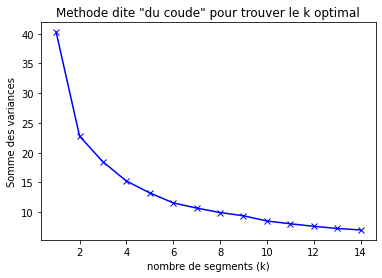

In [3]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('nombre de segments (k)')
plt.ylabel('Somme des variances')
plt.title('Methode dite "du coude" pour trouver le k optimal')

# plt.savefig('/content/drive/My Drive/MesDonnées/Fraud monitoring/elbowdatatransformed15data')
plt.show()

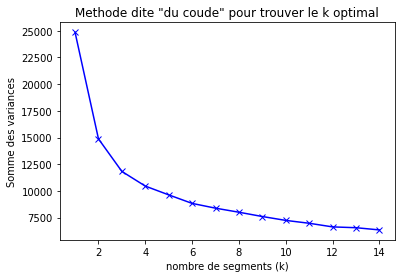

In [4]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(standardized)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('nombre de segments (k)')
plt.ylabel('Somme des variances')
plt.title('Methode dite "du coude" pour trouver le k optimal')

# plt.savefig('/content/drive/My Drive/MesDonnées/Fraud monitoring/elbowdatatransformed15data')
plt.show()

Text(0.5, 1.0, 'Methode dite "du coude" pour trouver le k optimal')

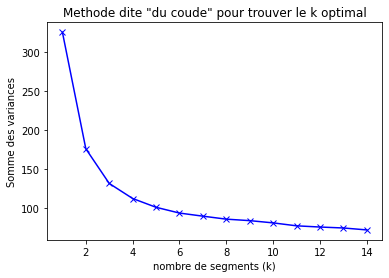

In [5]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(mmsed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('nombre de segments (k)')
plt.ylabel('Somme des variances')
plt.title('Methode dite "du coude" pour trouver le k optimal')

In [10]:
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#calculs
coord = acp.fit_transform(standardized)
#nombre de composantes calculées
#print(acp.n_components_) # = nbre de variables
#print(acp.explained_variance_ratio_)
n = normalized.shape[0]
p= normalized.shape[1]
#print(n)
#print (p)
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.73704991e+01 1.23974119e+00 1.11313449e+00 9.21782373e-01
 9.06268438e-01 8.64045084e-01 7.83528800e-01 5.81712429e-01
 5.05655086e-01 4.24034604e-01 4.03057030e-01 3.64418876e-01
 3.18032977e-01 2.43578417e-01 1.66513026e-01 1.45656243e-01
 1.35685063e-01 1.21354552e-01 1.05105929e-01 9.90077679e-02
 7.20592035e-02 4.54411483e-02 3.81090038e-02 1.81691651e-02
 7.66737614e-03 5.65084913e-03 9.17641127e-05]


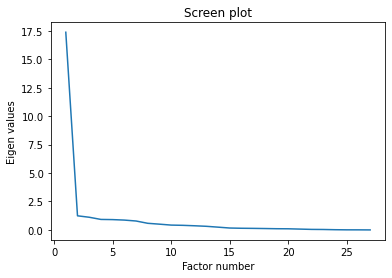

In [11]:
import numpy
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Screen plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

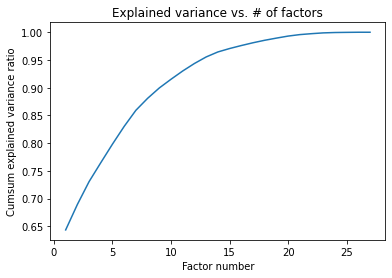

In [12]:
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [22]:
import random
random.seed(0)
Segmentation = KMeans(n_clusters=6).fit(normalized)
Segclust = Segmentation.cluster_centers_
Segpred = Segmentation.predict(normalized)
Segprev = pd.DataFrame(Segpred,columns= ['prevision'])
print(Segprev['prevision'].value_counts())

1    309
2    286
4    156
0     62
3     57
5     51
Name: prevision, dtype: int64


In [25]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
#3D Plotly Visualisation of Clusters using go

Segmentation_labels = Segmentation.labels_

layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)

colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(9)]
for i in range(0,8):
    my_members = (Segmentation_labels == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=coord[my_members, 0],
            y=coord[my_members, 1],
            z=coord[my_members, 2],
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
   
            )

fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7]], layout=layout)
    
py.offline.iplot(fig)

In [27]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
#3D Plotly Visualisation of Clusters using go

pca = PCA(n_components=3)  # Reduce to k=3 dimensions

X_reduce = pca.fit_transform(standardized)

layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)

colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(9)]
for i in range(0,8):
    my_members = (Segmentation.labels_ == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=X_reduce[my_members, 0],
            y=X_reduce[my_members, 1],
            z=X_reduce[my_members, 2],
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
   
            )

fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7]], layout=layout)
    
py.offline.iplot(fig)

In [21]:
import plotly.express as px
df = normalized
fig = px.scatter_3d(df, x=X_reduce[:,0], y=X_reduce[:,1], z=X_reduce[:,2], color = Segmentation.labels_, opacity=0.7)
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        )),
                  selector=dict(mode='markers'))
fig.show()